In [32]:
## DATABASE

import os
from supabase import create_client, Client

url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)

In [33]:
SERIE_ID = '57XX'
INFO = ""

In [34]:
import pandas as pd
import json
from app import TABLE_DATA

DATAFRAME = pd.read_csv(r'C:\Users\GONZA_PA\Desktop\VDC_POINTS.csv')
# print(DATAFRAME)

SQL_MODELS = supabase.table("MODELS").select("Id", "DB").execute().data
# for model in SQL_MODELS:
#     print(model)
MODELS = {model['Id']: json.loads(model['DB'])['SPECIFICATIONS'] for model in SQL_MODELS}
# print(MODELS['FLKE_5730A'])
SPEC_FLKE_5730A = pd.DataFrame(MODELS['FLKE_5730A']['VDC_SOURCES'])
DATAFRAME['SPEC_FLKE_5730A'] = None
# print(SPEC_FLKE_5730A)

for iloc in range(len(DATAFRAME)):
    VALUE1 = DATAFRAME.iloc[iloc]['VALUE1']
    VALUE2 = DATAFRAME.iloc[iloc]['VALUE2']
    # print(VALUE1)
    ## 5730
    DATAFRAME.at[iloc, 'SPEC_FLKE_5730A'] = TABLE_DATA.GET_VALUE(SPEC_FLKE_5730A, VALUE1, VALUE2)
    

print(DATAFRAME)

      RANGE    VALUE1  VALUE2 FLKE_5730A
0      0.22     0.022     NaN   0.000006
1      0.22     0.110     NaN   0.000007
2      0.22     0.220     NaN   0.000008
3      2.20     0.022     NaN   0.000006
4      2.20     1.100     NaN   0.000009
5      2.20     2.200     NaN   0.000016
6     22.00     0.220     NaN   0.000008
7     22.00    11.000     NaN   0.000112
8     22.00    22.000     NaN   0.000219
9    220.00     2.200     NaN   0.000016
10   220.00   110.000     NaN    0.00096
11   220.00   220.000     NaN    0.00184
12  1100.00    11.000     NaN   0.000112
13  1100.00   550.000     NaN    0.00545
14  1100.00  1100.000     NaN     0.0104


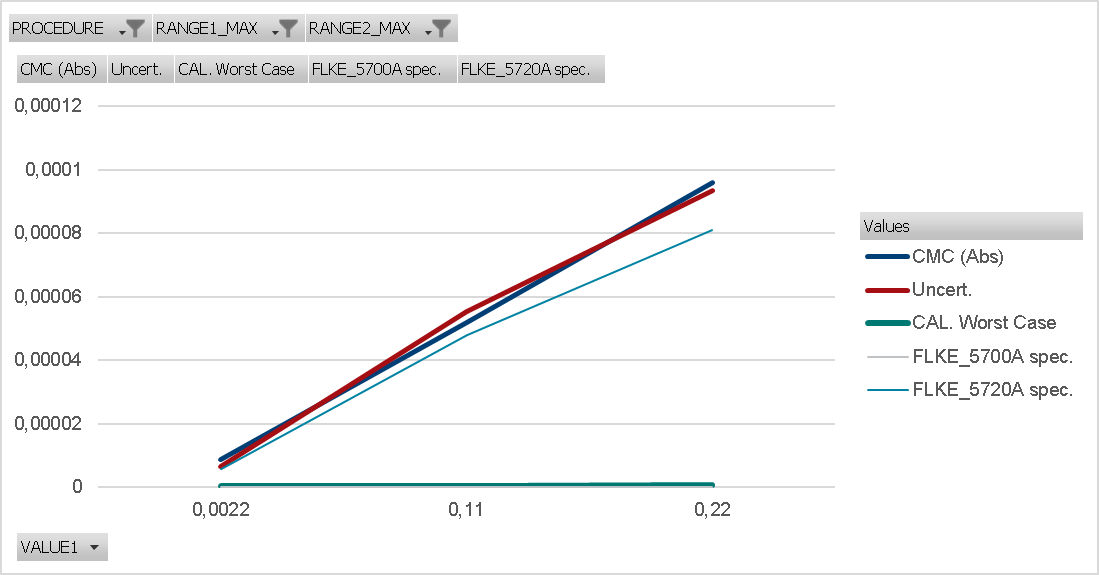